# Lotka-Volterra equations

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
import ipywidgets as ipw

## May-Leonard Steady State Solver

In [67]:
########## MAY-LEONARD STEADY STATE SOLVER ###########

import sympy as sp

N1, N2, N3, alpha, beta = sp.symbols('N1, N2, N3, alpha, beta')

eq1 = sp.Eq(N1 * (1 - N1          - alpha * N2  - beta * N3), 0)
eq2 = sp.Eq(N2 * (1 - beta * N1   - N2          - alpha * N3), 0)
eq3 = sp.Eq(N3 * (1-  alpha * N1  - beta * N2   - N3), 0)

ans = sp.solve((eq1, eq2, eq3), (N1, N2, N3))
ans

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, (alpha - 1)/(alpha*beta - 1), (beta - 1)/(alpha*beta - 1)),
 (1, 0, 0),
 ((alpha - 1)/(alpha*beta - 1), (beta - 1)/(alpha*beta - 1), 0),
 ((beta - 1)/(alpha*beta - 1), 0, (alpha - 1)/(alpha*beta - 1)),
 (1/(alpha + beta + 1), 1/(alpha + beta + 1), 1/(alpha + beta + 1))]

## Dynamics for the special case $\alpha + \beta = 2$

In [133]:
alpha = 1.4 
beta = 0.6
x0 = 0.4
y0 = 0.24
z0 = 1

def derivative(X, t, alpha, beta):
    x, y, z = X
    dotx = x * (1. - x         - alpha * y  - beta * z)
    doty = y * (1. - beta * x  - y          - alpha * z)
    dotz = z * (1. - alpha * x - beta * y   - z)
    return np.array([dotx, doty, dotz])

In [138]:
Nt = 200000
tmax = 3000.
t = np.linspace(0.,tmax, Nt)
X0 = [x0, y0, z0]
res = integrate.odeint(derivative, X0, t, args = (alpha, beta))
x, y, z  = res.T

<IPython.core.display.Javascript object>


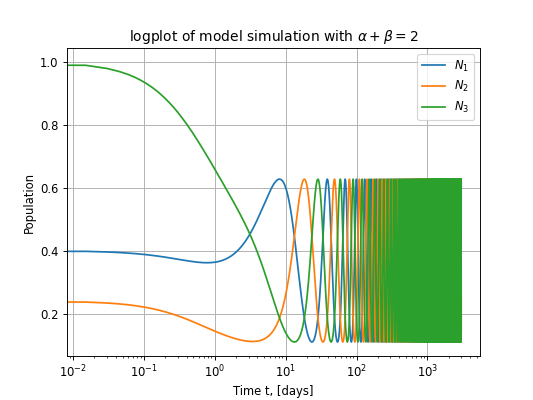

In [141]:
plt.figure()
plt.grid()
plt.title(r"logplot of model simulation with $\alpha + \beta = 2$")
plt.semilogx(t, x,  label = r'$N_1$')
plt.semilogx(t, y,  label = r'$N_2$')
plt.semilogx(t, z,   label = r'$N_3$' )
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


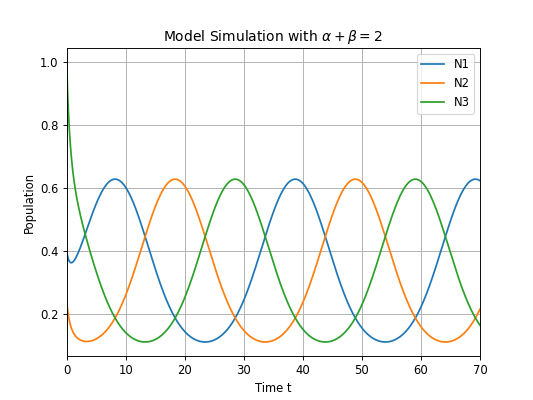

In [140]:
plt.figure()
plt.grid()
plt.title(r"Model Simulation with $\alpha + \beta = 2$")
plt.plot(t, x,  label = 'N1')
plt.plot(t, y,  label = "N2")
plt.plot(t, z,   label = "N3" )
plt.xlabel('Time t')
plt.xlim(0,70)
plt.ylabel('Population')
plt.legend()

plt.savefig('alphabeta2_simulation_fig.pdf', dpi=400)
plt.show()

<IPython.core.display.Javascript object>


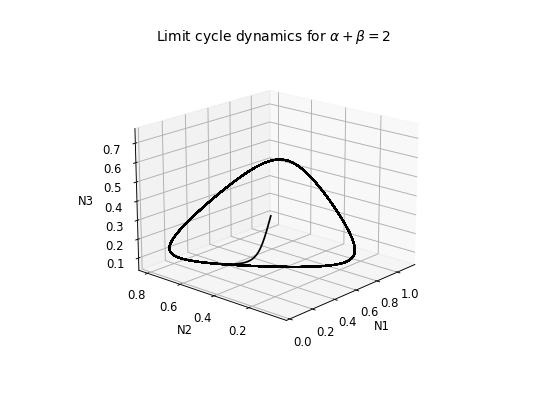

In [16]:
alpha = 1.2
beta = 0.8
x0 = 1.1
y0 = 0.8
z0 = 0.1

def derivative(X, t, alpha, beta):
    x, y, z = X
    dotx = x * (1. - x         - alpha * y  - beta * z)
    doty = y * (1. - beta * x  - y          - alpha * z)
    dotz = z * (1. - alpha * x - beta * y   - z)
    return np.array([dotx, doty, dotz])



Nt = 200000
tmax = 3000.
t = np.linspace(0.,tmax, Nt)
X0 = [x0, y0, z0]
res = integrate.odeint(derivative, X0, t, args = (alpha, beta))
x, y, z  = res.T

fig2 = plt.figure()
ax = plt.axes(projection='3d')


ax.plot3D(x, y, z, 'black')
plt.title(r"Limit cycle dynamics for $\alpha + \beta = 2$")

plt.xlabel('N1')
plt.ylabel('N2')
ax.set_zlabel('N3')
plt.savefig('alphabeta2_limitcycle_fig.pdf', dpi=400)
plt.show()

### Single Species Stable Steady State Dynamics ($\alpha > 1, \beta > 1$)

In [121]:
alpha = 1.2
beta = 1.4
y0 = [0.2,0.4,0.6]
t = np.linspace(0, 5000, 200001)

def MayLeonard(N, t, alpha, beta):
    N1, N2, N3 = N
    dydt = [N1*(1- N1 - alpha*N2 - beta*N3), 
            N2*(1- N2 - alpha*N3 - beta*N1), 
            N3*(1- N3 - alpha*N1 - beta*N2)]
    return dydt

<IPython.core.display.Javascript object>


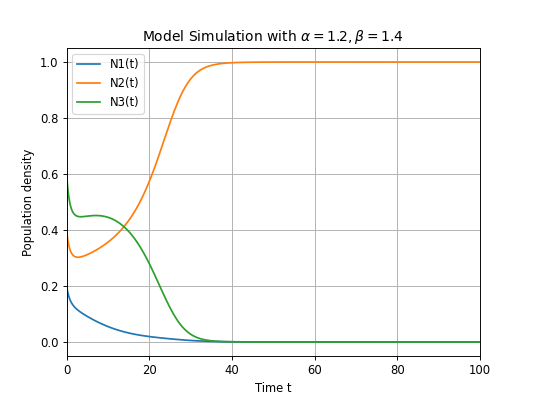

In [123]:
##alpha + beta > 2
sol1 = odeint(MayLeonard, y0, t, args=(alpha, beta))

plt.figure()
plt.grid()
plt.title(r"Model Simulation with $\alpha = 1.2, \beta = 1.4$")
plt.plot(t, sol1[:, 0], label='N1(t)')
plt.plot(t, sol1[:, 1], label='N2(t)')
plt.plot(t, sol1[:, 2], label='N3(t)')
plt.legend(loc='best')
plt.xlabel('Time t')
plt.xlim(0,100)
plt.ylabel('Population density')
plt.legend()
plt.savefig('single_species_stable.pdf', dpi=400)
plt.show()

### Three Species Stable Steady State Dynamics

In [124]:
##alpha + beta < 2
sol2 = odeint(MayLeonard, y0, t, args=(1.4, 0.5))

<IPython.core.display.Javascript object>


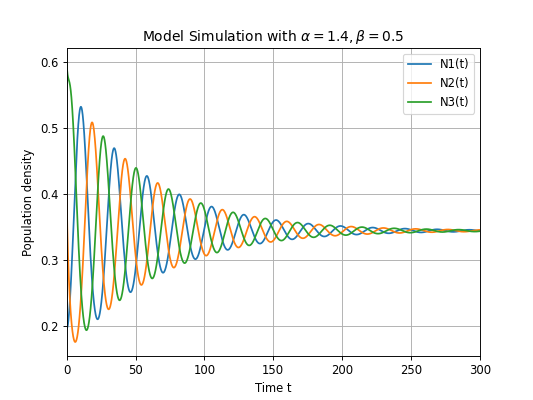

In [127]:
plt.figure()
plt.grid()
plt.title(r"Model Simulation with $\alpha = 1.4, \beta = 0.5$")
plt.plot(t, sol2[:, 0], label='N1(t)')
plt.plot(t, sol2[:, 1], label='N2(t)')
plt.plot(t, sol2[:, 2], label='N3(t)')
plt.legend(loc='best')
plt.xlabel('Time t')
plt.xlim(0,300)
plt.ylabel('Population density')
plt.legend()
plt.savefig('three-species-2d.pdf', dpi=400)
plt.show()

<IPython.core.display.Javascript object>


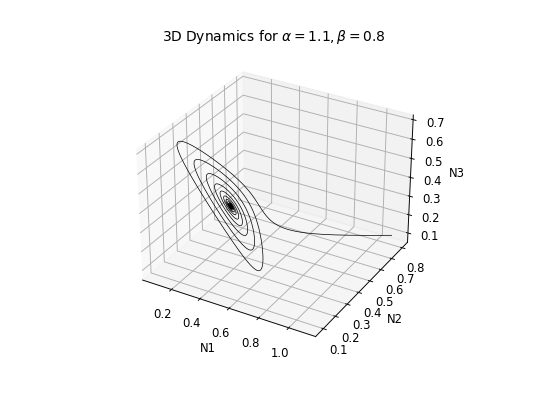

In [128]:
alpha = 1.4
beta = 0.5
x0 = 1.1
y0 = 0.8
z0 = 0.1

def derivative(X, t, alpha, beta):
    x, y, z = X
    dotx = x * (1. - x         - alpha * y  - beta * z)
    doty = y * (1. - beta * x  - y          - alpha * z)
    dotz = z * (1. - alpha * x - beta * y   - z)
    return np.array([dotx, doty, dotz])



Nt = 200000
tmax = 3000.
t = np.linspace(0.,tmax, Nt)
X0 = [x0, y0, z0]
res = integrate.odeint(derivative, X0, t, args = (alpha, beta))
x, y, z  = res.T

fig2 = plt.figure()
ax = plt.axes(projection='3d')


ax.plot3D(x, y, z, 'black', lw=0.6)
plt.title(r"3D Dynamics for $\alpha = 1.1, \beta = 0.8$")

plt.xlabel('N1')
plt.ylabel('N2')
ax.set_zlabel('N3')
plt.savefig('3species_steadystate.pdf', dpi=400)
plt.show()

## Instability Region: $\alpha + \beta > 2$ and $\beta < 1$ or $\alpha < 1$

In [5]:
alpha = 1.4
beta = 0.7
y0 = [1.1,0.8,0.1]
t = np.linspace(0, 5000, 200001)

def MayLeonard2(N, t, alpha, beta):
    N1, N2, N3 = N
    dydt = [N1*(1- N1 - alpha*N2 - beta*N3), 
            N2*(1- N2 - alpha*N3 - beta*N1), 
            N3*(1- N3 - alpha*N1 - beta*N2)]
    return dydt

In [6]:
sol = odeint(MayLeonard2, y0, t, args=(alpha, beta))

plt.figure()
plt.grid()
plt.title(r"Model Simulation with $\alpha = 1.4 \beta = 1.7$")
plt.plot(t, sol[:, 0], label='N1(t)')
plt.plot(t, sol[:, 1], label='N2(t)')
plt.plot(t, sol[:, 2], label='N3(t)')
plt.legend(loc='best')
plt.xlabel('Time t')
plt.xlim(0,600)
plt.ylabel('Population density')
plt.legend()
plt.savefig('sim1.pdf', dpi=400)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


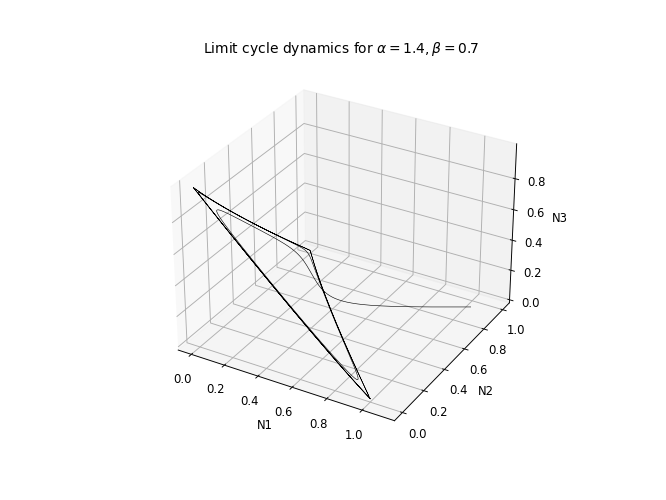

In [131]:
alpha = 1.4
beta = 0.7
x0 = 1.1
y0 = 0.8
z0 = 0.1

def derivative(X, t, alpha, beta):
    x, y, z = X
    dotx = x * (1. - x         - alpha * y  - beta * z)
    doty = y * (1. - beta * x  - y          - alpha * z)
    dotz = z * (1. - alpha * x - beta * y   - z)
    return np.array([dotx, doty, dotz])



Nt = 200000
tmax = 3000.
t = np.linspace(0.,tmax, Nt)
X0 = [x0, y0, z0]
res = integrate.odeint(derivative, X0, t, args = (alpha, beta))
x, y, z  = res.T

fig2 = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')


ax.plot3D(x, y, z, 'black', lw = 0.5)
plt.title(r"Limit cycle dynamics for $\alpha = 1.4, \beta = 0.7$")

#cols = 'rgbcmy'

#for i in range(len(x)-1):
#    ax.plot(x[i], y[i], z[i], color=cols[i%6])

plt.xlabel('N1')
plt.ylabel('N2')
ax.set_zlabel('N3')
plt.savefig('alphabetag2_limitcycle_fig.pdf', dpi=400)
plt.show()


<IPython.core.display.Javascript object>


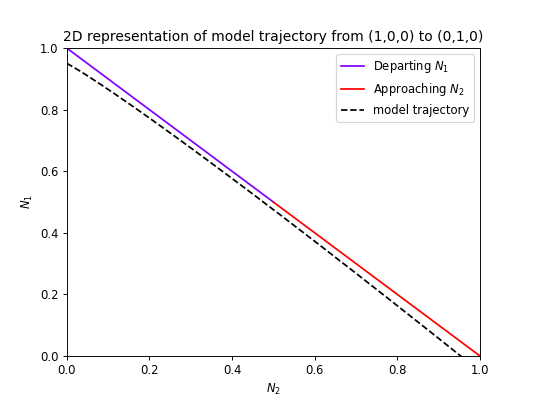

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

lines = [[(0, 1/2), (1,1/2)],
        [(1/2,1),(1/2,0)]]

z = np.array([0.1, 9.4, 3.8, 2.0])

a = np.linspace(0,1.1,1000)
b = 0.95- a**1.075


legend_list = [r'Departing $N_1$', r'Approaching $N_2$']
fig, ax = plt.subplots()
cmap = plt.get_cmap('rainbow')

def normalize(z):
    z = z.copy()
    z -= z.min()
    z /= z.max()
    return z

for (x, y), color, label in zip(lines, normalize(z), legend_list):
    plt.plot(x, y, label=label, color=cmap(color), lw=1.5)
plt.plot(a, b, 'k--', label='model trajectory')
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel(r'$N_2$')
plt.ylabel(r'$N_1$')
plt.title(r'2D representation of model trajectory from (1,0,0) to (0,1,0)')
ax.legend()
plt.savefig('N2N3dynamics.pdf', dpi=400)
plt.show()

In [1]:
#Plot to focus on difference in omegas

def fun(y,t, alpha, beta):                        #F(u) in the ODE system
    N1, N2, N3 = y 
    return np.array([N1*(1- N1 - alpha*N2 - beta*N3), 
            N2*(1- N2 - alpha*N3 - beta*N1), 
            N3*(1- N3 - alpha*N1 - beta*N2)])



time = np.linspace(0, 500, 10000)  #timespan

init_cond = [(0.4,0.3, 0.1)]                 #initial conditions for c, u, v


#scenarios = [[alpha, beta]]
scenarios = [[0.7, 1.4], [1.4, 0.7]]


fig, ax = plt.subplots(2,1,figsize=(12,12))
plt.subplots_adjust(hspace = 0.7, wspace = 0.3)
plt.rc('legend', fontsize=16)
traject = {}
for i,param in enumerate(scenarios):
    for j,ic in enumerate(init_cond):
        traject[i,j] = odeint(partial(fun, alpha=param[0],beta=param[1]),y0=ic, t=time)
        ax[i].set_title(r'$N_1, N_2, N_3$ Dynamics, Initial Conditions $(\alpha, \beta)$ =(' + str(param[0]) + ',' + str(param[1]) + ')',fontsize=20,pad=50)
        ax[i].set_xlabel('Time', fontsize=16)
        ax[i].set_ylabel('Species Trajectories', fontsize=16)
        ax[i].plot(time,traject[i,j][:,0], label=r'$N_1$',color = 'orange', alpha = 0.9)
        ax[i].plot(time,traject[i,j][:,1], label=r'$N_2$', color = 'g', alpha = 0.9)
        ax[i].plot(time,traject[i,j][:,2], label=r'$N_3$', color = 'b', alpha = 0.9)
        ax[i].legend(loc='upper right', fontsize=14)
        plt.sca(ax[i])
        plt.xticks(fontsize=16, family='serif')
        plt.yticks(fontsize=16, family='serif')


plt.savefig('q3GW4.pdf', dpi=400)

NameError: name 'np' is not defined